# <center> HUMAN ACTIVITY RECOGNITION WITH SMART PHONES <center>

Recognizing human activities from temporal streams of sensory data observations is a 
very important task on a wide variety of applications in context recognition. Human activities 
are hierarchical in nature, i.e. the complex activities can be decomposed to several simpler 
ones. Human activity recognition is the problem of classifying sequences of accelerometer
data recorded by pre-installed sensors in smart phones into known well-defined 
movements to make it ready for predictive modelling.

### Question:
Perform activity recognition on the dataset using a hidden markov model. Then perform the 
same task using a different classification algorithm (logistic regression/decision tree) of your 
choice and compare the performance of the two algorithms

### Problem statement:
Classify the Human activities based on data collected from smartphones. The activities include
- walking
- walking upstairs
- walking downstairs
- sitting
- standing
- laying.

The dataset contains various features such as accelerometer and gyroscope reading from the smart phone.

### Dataset:
- The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.
- It contains 561 features,which are the result of preprocessing the accelerometer and gyroscope readings from the smartphone with 6 activities as mentioned above.
- The dataset contains 7352 samples for training and 2947 samples for testing.

### Feature selection:
Since the dataset contains a large number of faetures ,we need to perform feature selection to reduce the number of features to improve the performance of the model.

### Procedure
- Importing Libraries
- Data Preprocessing
- Store Feature Matrix in x and Target in Vector y
- Splitting data into training and testing
- Hidden Markov Model
- Use Logistic Regression
- Random forest Classifier
- Evaluation
- Feature selection
- Filter Method
- Wrapper Method

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
data=pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv")# Training data
dat_test=pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/test.csv")# Testing data

### Displaying the first 5 rows of the dataset

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Check last 5 rows of the dataset

In [4]:
data.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


### Checking the shape of the dataset( Number of rows and columns)

In [5]:
print("Number of rows: " ,data.shape[0])
print("Number of columns: ",data.shape[1])

Number of rows:  7352
Number of columns:  563


### Chhecking Duplicate:

In [6]:
# To check the rows with the same data
data.duplicated().any()# False=> there is no duplicated row in the dataset

False

In [7]:
# To check the columns with the same data( checking column duplicates)
# - Transpose the dataframe so that we can use and use .duplicated() 
# - use data.columns to find the duplicated columns 
# - the make it a list
# - Assign it to the variable duplicated_columns
# - Check the length of the duplicated columns
# - Drop the duplicates
duplicated_columns=data.columns[data.T.duplicated()].tolist()
duplicated_columns

['tBodyAccMag-sma()',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-sma()',
 'tBodyGyroMag-sma()',
 'tBodyGyroJerkMag-sma()',
 'fBodyAccMag-sma()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroJerkMag-sma()']

In [8]:
len(duplicated_columns)

21

In [9]:
data=data.drop(duplicated_columns,axis=1)

In [10]:
data.shape# the shape will be changed after removing the duplicates

(7352, 542)

### Checking Missing Values

In [11]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

### Checking the distribution of target variable

In [12]:
target=data['Activity'].value_counts()
target

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


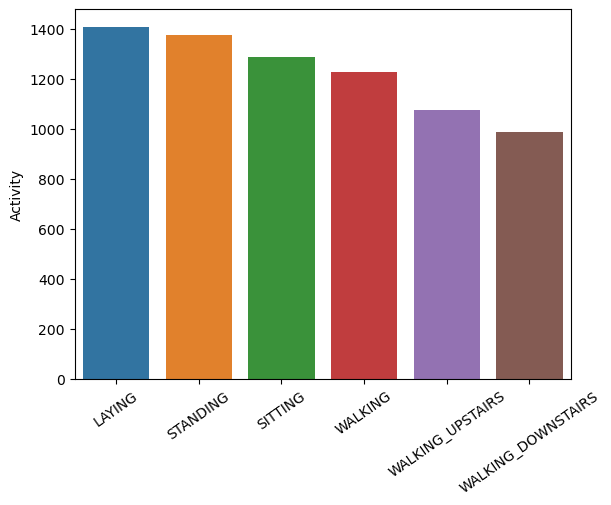

In [13]:
# Plotting the above
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=data,x=target.index,y=target)
plt.xticks(rotation=35)
plt.show()

### Store Feature Matrix in X and Response(Target) in Vector y

In [14]:
x=data.drop('Activity',axis=1)
y=data['Activity']

In [15]:
y # Target variable contains string variables but machine learning algorithm can understanged only numerical value so we need to encode the target column

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [17]:
y

array([2, 2, 2, ..., 5, 5, 5])

### Splitting the dataset into Training Set and Testing Set

In [18]:
from sklearn.model_selection import train_test_split

Dividing the dataset into 4 parts and 2 set. One for training and one for testing. We will train the machine learning model with x_train and y_train.We will test our model with the samples x_test and compare the predicted values by the model with y_test.


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

Target variable is categorical. So this is a Classification Problem. It is a multiclass classification problem because the target variable has more than two classes. So we need to use classification models. Logistic Regression and Random Forest. So we need to check the accuracy for both before feature selection.

### Standadizing the features using Standard Scalar

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


### Hidden Markov Model

In [22]:
!pip install hmmlearn

In [23]:
from hmmlearn import hmm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
# As x_train and x_test has negative values
# Convert the sequences to nonnegative integers
x_train_nonnegative = x_train_scaled - x_train_scaled.min() + 1
x_train_nonnegative = x_train_nonnegative.astype(int)
# HMM model
hmm_model = hmm.MultinomialHMM(n_components=6, n_iter=100, random_state=42)
hmm_model.fit(x_train_nonnegative)  # Fit the HMM model


MultinomialHMM(n_components=6, n_iter=100,
               n_trials=array([12602, 12967, 13040, ..., 12806, 12597, 13012]),
               random_state=RandomState(MT19937) at 0x794C36704840)

In [57]:
x_test_nonnegative = x_test_scaled - x_test_scaled.min() + 1
x_test_nonnegative = x_test_nonnegative.astype(int)
hmm_predictions = hmm_model.predict(x_test_scaled)

/opt/conda/lib/python3.10/site-packages/scipy/stats/_multivariate.py:3053: RuntimeWarning: invalid value encountered in add
  return gammaln(n+1) + np.sum(xlogy(x, p) - gammaln(x+1), axis=-1)


In [58]:
# Checking Accuracy
hmm_accuracy=accuracy_score(y_test,hmm_predictions)
print("HMM Accuracy:", hmm_accuracy)

HMM Accuracy: 0.13596193065941536


### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
log=LogisticRegression()
log.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Predict using  x_test and check the accuracy score of actual values(y_test) and presdicted values(y_pred1)
y_pred1=log.predict(x_test)
accuracy_score(y_test,y_pred1)

0.981645139360979

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred2=rf.predict(x_test)
accuracy_score(y_test,y_pred2)

0.981645139360979

### Feature Extraction
  Feature also known as independent variables, are attributes or characteristics of a data that provide information for making predictions or classification.They are used as input in a machine learning model.
  The feature in a dataset are also called its dimensions. So a dataset having n features is called an n-dimensional dataset. 
  Features(independent variables) contribute to predict the target variable(dependent variable), target variable itself is not considered a feature.
  - Feature selection is the process of choosing the most important and useful features from a dataset. It is done to improve the performance ,efficiency and interpretability of machine learning models.
  - Feature selection is important because 
          - Better Performance model:
          Selecting relevant features helps the model capture important patterns and relationship in the data, leading to more accurate results
          - Overfitting Prevention:
          Including irrelevant or redundant features in a model can lead to overfitting.
          Feature selection helps to remove such features,reducing complexity of the model and preventing it from memorising noise in the training set.
          - Enhansed interpretability:
          With fewer features, the resulting model becomes simpler and easier to interpret.
          It allows humans to gain insights into the relationship between the selected features and the target variable,leading to better understanding and decision making.
          - Faster Computation:
          Working with fewer features reduces the computational resources required to train and use the model. This is important when dealing with large datasets.
          -Improved generalization:
          By selecting the most relevant features, the model becomes more robust and can make accurate predictions on new and unseen data.

### Filter method

In [32]:
from sklearn.feature_selection import SelectKBest,f_classif

In [33]:
k=200
selector=SelectKBest(f_classif,k=k)
x_train_selected=selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

# Getting Indices
selected_indices=selector.get_support(indices=True)
selected_features=x_train.columns[selected_indices]
print(selected_features)

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroMag-mad()', 'fBodyBodyGyroMag-max()',
       'fBodyBodyGyroMag-iqr()', 'fBodyBodyGyroMag-entropy()',
       'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroJerkMag-mad()',
       'fBodyBodyGyroJerkMag-iqr()', 'fBodyBodyGyroJerkMag-entropy()',
       'angle(X,gravityMean)', 'angle(Y,gravityMean)'],
      dtype='object', length=200)


### Wrapper Method

In [34]:
# From 200 features selected by Select K Best we are going to select 100 features using RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [35]:
estimator=RandomForestClassifier()

In [36]:
k=100
rfe_selector=RFE(estimator,n_features_to_select=k)
x_train_selected_rfe=rfe_selector.fit_transform(x_train_selected,y_train)
x_test_selected_rfe=rfe_selector.transform(x_test_selected)

# Getting the indices
selected_indices_rfe=rfe_selector.get_support(indices=True)
selected_features_rfe=selected_features[selected_indices_rfe]
print(selected_features_rfe)

Index(['tBodyAcc-std()-X', 'tBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'tBodyAcc-energy()-X', 'tBodyAcc-entropy()-X', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y',
       'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-energy()-Y', 'tBodyAccJerk-std()-X',
       'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X',
       'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X',
       'tBodyAccJerk-max()-Y', 'tBodyAccJerk-max()-Z', 'tBodyAccJerk-sma()',
       'tBodyAccJerk-energy()-X', 'tBodyAccJerk-energy()-Y',
       'tBodyAccJerk-iqr()-X', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerk-entropy()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y',
       'tBodyGyro-std()-Z', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y',
       'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-min()-X',
       'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Z', 'tBodyGyroJerk-std()-

In [37]:
print(len(selected_features_rfe))

100


In [38]:
rf=RandomForestClassifier()

In [39]:
rf.fit(x_train_selected_rfe,y_train)

RandomForestClassifier()

In [40]:
y_pred_rf=rf.predict(x_test_selected_rfe)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred_rf)

0.9762066621346023

In [43]:
import joblib

In [44]:
joblib.dump(rf,'model_rfe')# Creating a model with random forest classifier

['model_rfe']

In [45]:
joblib.dump(selector,"k_best_selector")

['k_best_selector']

In [46]:
joblib.dump(rfe_selector,"rfe_selector")

['rfe_selector']

In [47]:
dat_test=dat_test.drop("Activity",axis=1)

In [48]:
duplicated_columns=dat_test.columns[dat_test.T.duplicated()].to_list()

In [49]:
dat_test=dat_test.drop(duplicated_columns,axis=1)

In [50]:
model=joblib.load('model_rfe')

In [51]:
selector=joblib.load("k_best_selector")

In [52]:
rfe_selector=joblib.load("rfe_selector")

In [53]:
selector=selector.transform(dat_test)

In [54]:
x_test_selected_rfe=rfe_selector.transform(selector)

In [55]:
model.predict(x_test_selected_rfe)

array([2, 2, 2, ..., 5, 5, 5])